# 第〇章 安装Jupyter notebook for R

* 参见：https://zhuanlan.zhihu.com/p/25430471
* 命令：
```
conda install -c r r-essentials
```

# 第一章 R语言介绍

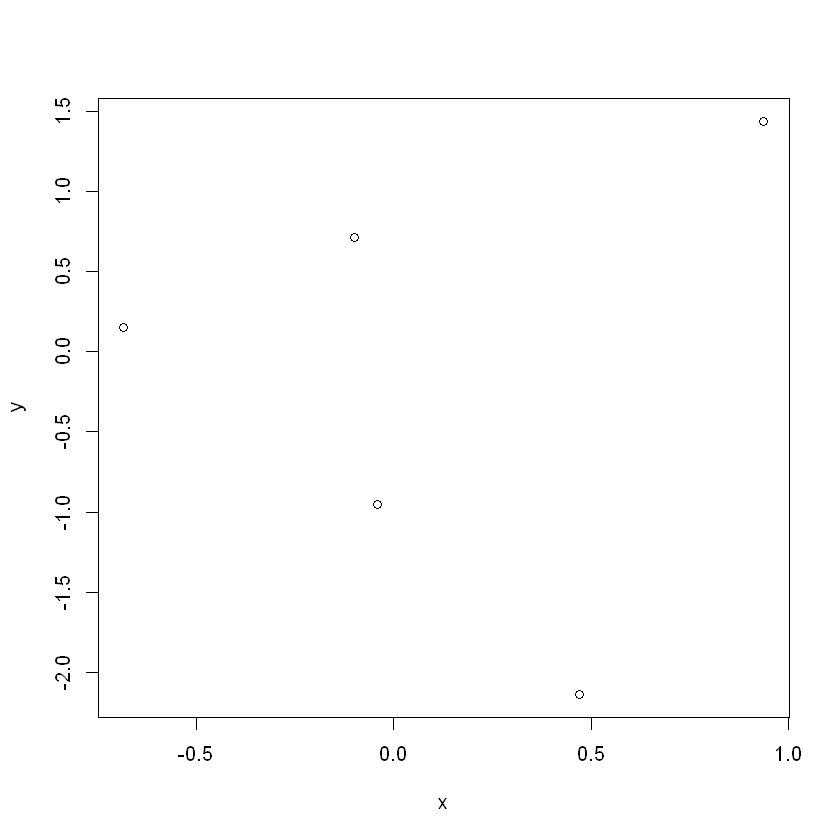

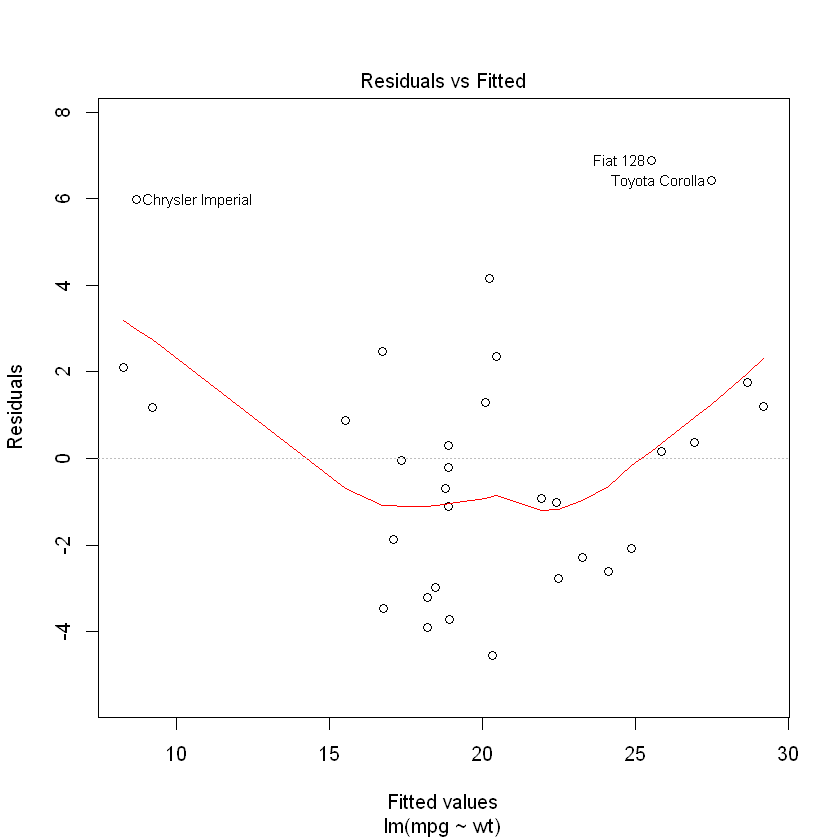

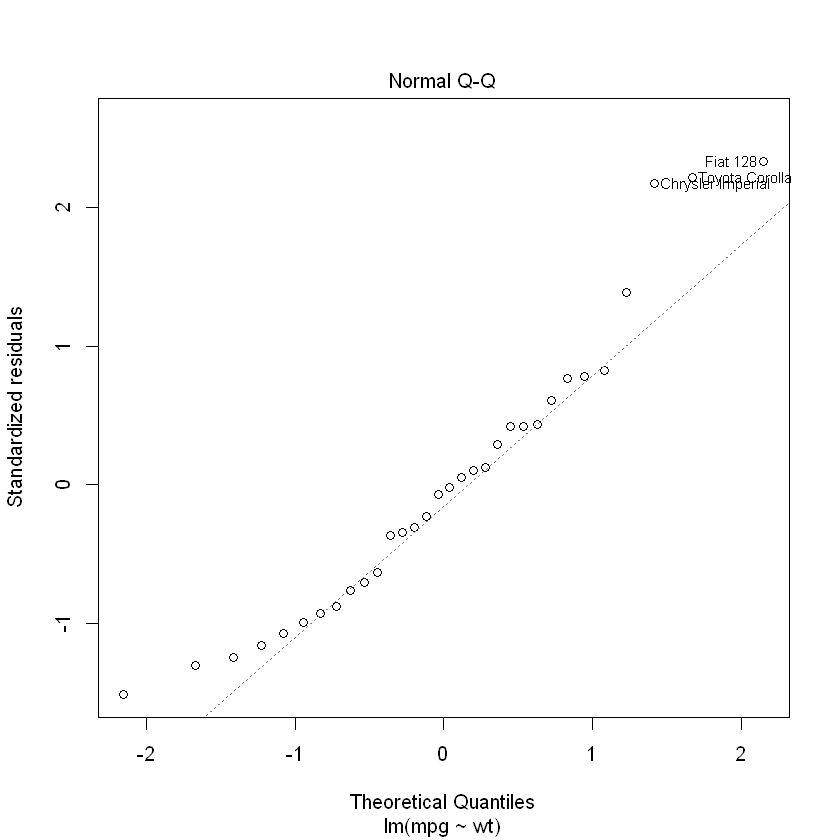

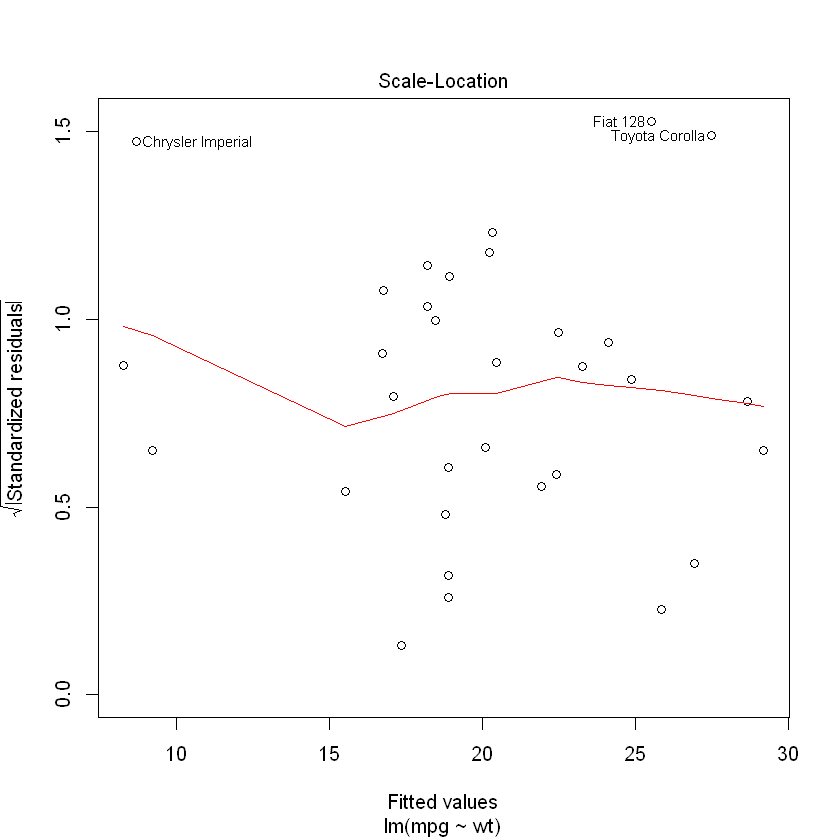

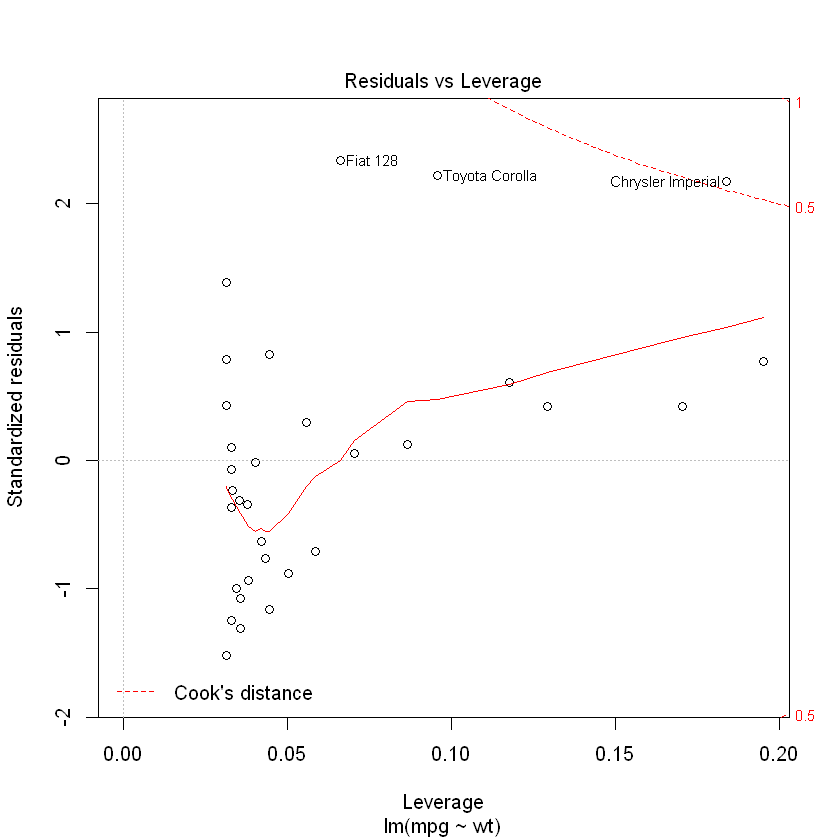

In [58]:
x<-rnorm(5)
y<-rnorm(5)
plot(x,y)
lmfit <- lm(mpg~wt, data=mtcars)
plot(lmfit)

In [38]:
getwd()
ls()

[1] "E:/code/R"

[1] "a" "b" "c" "d" "x" "y"

In [19]:
history(1)

ERROR: Error in .External2(C_savehistory, file): 'savehistory' can only be used in Rgui and Rterm


### 安装包

In [21]:
install.packages("vcd")

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lenovo\AppData\Local\Temp\Rtmpsn9aMi\downloaded_packages


# 第二章 创建数据集

### 向量

In [35]:
a<-c(1,2,3,4)
b<-c("two", 1, TRUE) # 所有的都变为string
c<-c(1, TRUE) # 所有的都变为bool
d<-c(TRUE, 'one', 1) # 所有的都变为string
a[1:3] # 不同于Python的左闭右开，这里是左闭右闭

[1] 1 2 3

### 矩阵

In [44]:
y <- matrix(1:20, nrow=5, ncol=4)
# y
# 根据向量创建矩阵
cells <- c(1,25,24,68)
rnames <-c('R1','R2')
cnames <-c('C1','C2')
# 按行填充的2*2矩阵
mymatrix <- matrix(cells, nrow = 2,ncol = 2,byrow=TRUE, dimnames = list(rnames, cnames))
# mymatrix

# 矩阵索引
y[1,2] # 注意不是从0开始的！

[1] 6

### 数组
* 与矩阵类似，维度可以大于2

### 数据框 data frame

jzm,age
1,1
3,9
4,2
5,6


[1] 1 9 2 6

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



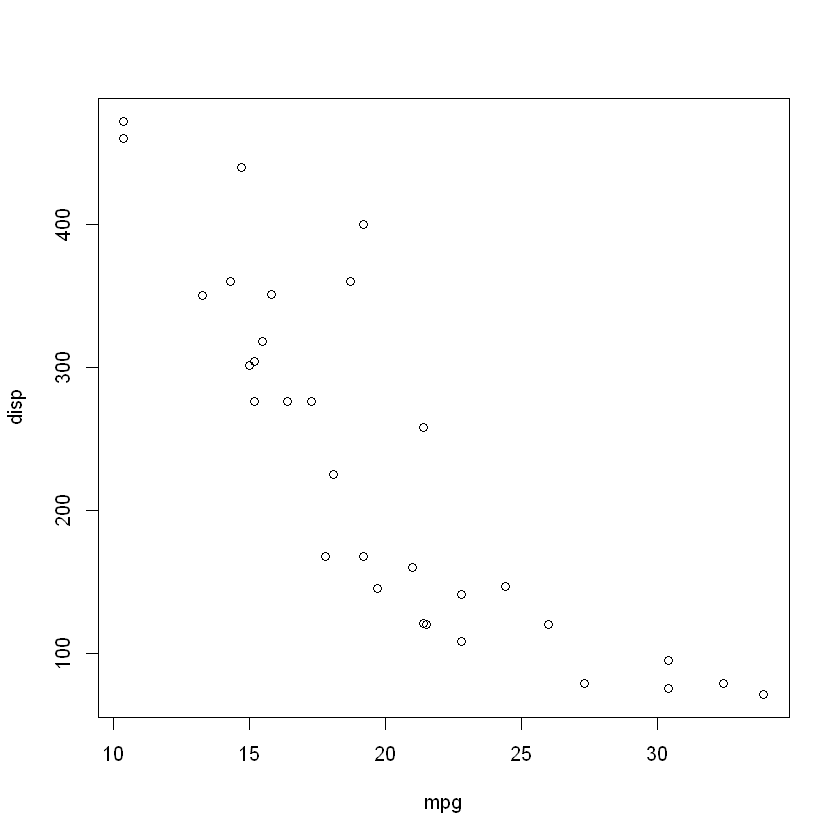

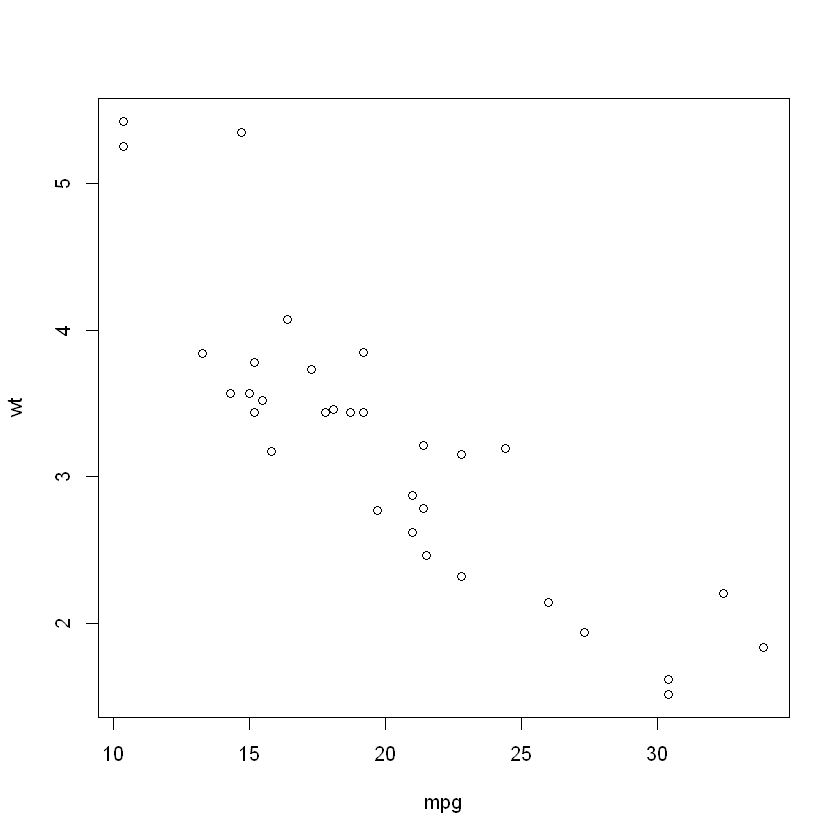

In [63]:
# 先输入几列数
jzm <- c(1,3,4,5)
age<-c(1,9,2,6)
moha <- data.frame(jzm, age)
# moha
# 访问data frame
# by index
moha[1:2] # 前两列
# mode[c('jzm', 'age')]
moha$age # 按列名索引

# attach功能，串列data frame或list或R data file
help(attach)
attach(mtcars)
plot(mpg, disp)
plot(mpg, wt)
detach(mtcars)

In [67]:
# 防止屏蔽用with
with(mtcars,{
#     summary(mpg, disp, wt)
#     plot(mpg, disp)
#     plot(mpg, wt)
    stats <<- summary(mpg) # 在with之外仍存活：用<<-赋值
}
    )
stats

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

### 因子factor
* 名义型+有序型

In [84]:
# 类别变量
diabetes <- c('Type1','Type2','Type1', 'Type1')
diabetes <- factor(diabetes)
# diabetes
# 有序变量
status <- c('Poor', 'Improved', 'Excellet','Poor') 
status <- factor(status, ordered = TRUE)# 默认字符型按字母顺序排
status[1]<status[2]
# 自定义字符串排列顺序
status <- factor(status, ordered = TRUE, levels = c('Poor', 'Improved', 'Excellent'))
status[1]<status[2]

[1] FALSE

[1] TRUE

In [86]:
str(moha)
summary(moha)

'data.frame':	4 obs. of  2 variables:
 $ jzm: num  1 3 4 5
 $ age: num  1 9 2 6


      jzm            age      
 Min.   :1.00   Min.   :1.00  
 1st Qu.:2.50   1st Qu.:1.75  
 Median :3.50   Median :4.00  
 Mean   :3.25   Mean   :4.50  
 3rd Qu.:4.25   3rd Qu.:6.75  
 Max.   :5.00   Max.   :9.00  

### 列表list
* 对象的有序集合

In [99]:
mylist <- list(moha, jzm, mymatrix)
mylist[1:3]

[[1]]
  jzm age
1   1   1
2   3   9
3   4   2
4   5   6

[[2]]
[1] 1 3 4 5

[[3]]
   C1 C2
R1  1 25
R2 24 68

In [115]:
g <- 'title'
h <- c(1926, 817)
j <- matrix(1:10, nrow = 5)
mylist <- list(title=g, ages=h,j)
mylist[1] # 访问matrix会出现莫名其妙的问题

$title
[1] "title"

In [118]:
x <- c(1,2,3)
x[7]<-10
x

[1]  1  2  3 NA NA NA 10

### 导入数据

In [127]:
# 从csv中导入
grades <- read.table('jzm.csv', header = TRUE, sep='\t', row.names = 'name')
grades

,age
jiangzemin,91
songzuying,50
hujintao,75


In [144]:
# 从excel中导入

# install.packages('RODBC') #需要安装此包
# 下面代码出现错误Error in odbcConnectExcel("test.xlsx"): odbcConnectExcel is only usable with 32-bit Windows
    # library('RODBC')
    # channel <- odbcConnectExcel('test.xlsx')
    # mydf <- sqlFetch(channel, 'sheet1')
    # odbcClose(channel)

# 用readxl包
# install.packages("readxl")
library('readxl')
df <- read_excel("test.xlsx", sheet='Sheet1')
df
# 用xlsx包
# install.packages("xlsx")
# library("xlsx")
# df <- read.xlsx('test.xlsx')

X__1,STRALHERORDER,NUM,AVGA,AVGW,AVGSLOPEERO,AVGCHANNELERO,SSY_slope,SSY_channel
0,1,30741,5.875039e+04,5.099316e+03,7.722357e+05,0.000000e+00,13.14435,0.000000
1,2,6611,2.645760e+05,2.252420e+04,3.442017e+06,3.248399e+05,13.00956,1.227775
2,3,1399,1.272063e+06,1.091589e+05,1.679813e+07,3.456164e+06,13.20543,2.716977
3,4,302,5.929190e+06,5.162037e+05,7.978070e+07,5.521171e+07,13.45558,9.311847
4,5,50,3.434885e+07,3.007181e+06,4.426105e+08,6.773810e+08,12.88574,19.720630
5,6,13,1.489875e+08,1.391090e+07,1.989905e+09,4.954790e+09,13.35619,33.256405
6,7,4,4.603246e+08,4.101754e+07,5.752501e+09,1.670853e+10,12.49662,36.297281
7,8,1,3.087597e+09,2.624912e+08,3.809102e+10,1.382067e+11,12.33679,44.761900


In [149]:
# 从数据库中导入
library('RODBC')
myconn <- odbcConnect('orcl', uid='c##huangfuchuan', pwd='huangfuchuan')
rc <- sqlQuery(myconn, 'select * from riversegs')
str(rc)
close(myconn)

'data.frame':	61524 obs. of  44 variables:
 $ CHANNELINDEX : int  1153 1154 1156 1157 1158 1159 1155 1161 1880 1878 ...
 $ STRALHERORDER: int  2 2 2 2 1 1 1 1 1 1 ...
 $ UPSTREAMROW  : int  159 159 160 160 159 156 163 158 345 345 ...
 $ UPSTREAMCOL  : int  467 465 459 457 451 456 461 463 632 628 ...
 $ DOWNSTREAMPR : int  169 159 159 160 160 159 160 158 346 345 ...
 $ DOWNSTREAMPC : int  486 466 464 458 456 456 465 466 629 623 ...
 $ DOWNSTREAMLR : int  170 159 159 160 160 160 159 159 346 346 ...
 $ DOWNSTREAMLC : int  487 467 465 459 457 457 465 467 628 622 ...
 $ AREASOURCE   : num  -1 -1 -1 -1 17490 ...
 $ AREALEFT     : num  70660 700 4198 3498 31482 ...
 $ AREARIGHT    : num  86751 700 12593 25885 18190 ...
 $ SLOPESOURCE  : num  -1 -1 -1 -1 0.158 ...
 $ SLOPELEFT    : num  0.154 0 0.24 0.175 0.146 ...
 $ SLOPERIGHT   : num  0.119 0 0.156 0.146 0.169 ...
 $ ASPECTLEFT   : num  209 180 171 180 189 ...
 $ ASPECTRIGHT  : num  28.81 0 350.54 0 9.46 ...
 $ ASPECTSOURCE : num  -1 -1 -1 